In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("data_regression.csv")

df.head()

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  
0                    4.0                       1    0.0  
1                    3.0                       2    0.0  
2                    4.0                       5    1.0  
3                    3.0                       3    0.0  
4                    3.0                       1    0.0

In [3]:
def inspection(dataframe):
    print(f"The shape of the data is {dataframe.shape[0]} rows and {dataframe.shape[1]} columns")

    print("--------------------------------------------------------\n")

    print(f"The data types are {dataframe.dtypes}")

    print("--------------------------------------------------------\n")

    print(f"The total samples with missing values are {dataframe.isnull().any(axis=1).sum()}")

    print("--------------------------------------------------------\n")

    print(f"The total misssing values per variables are {dataframe.isnull().sum()}")

    print("--------------------------------------------------------\n")

    print(f"Map of missing values are {sns.heatmap(dataframe.isnull())}")

    print("--------------------------------------------------------\n")

The shape of the data is 2000 rows and 16 columns
--------------------------------------------------------

The data types are year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
--------------------------------------------------------

The total samples with missing values are 82
--------------------------------------------------------

The total misssing values per variables are year                       0
customer_id                0
phone_no                   0
gender                 

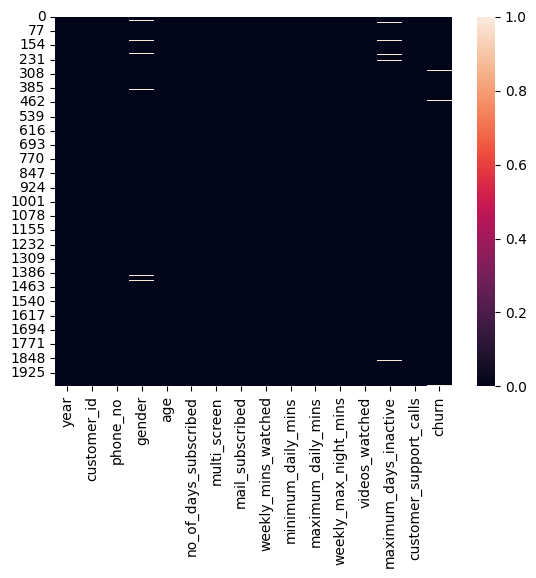

In [4]:
inspection(df)

In [5]:
#drop null values

df = df.dropna()

In [6]:
# Encode categorical variables

cat_var = df.select_dtypes(include="object").drop(columns=["phone_no"])

def encode_categories(df, variables):
    from sklearn.preprocessing import OrdinalEncoder
    ord_enc = OrdinalEncoder()
    for v in variables:
        df[v] = ord_enc.fit_transform(df[[v]])
        print(f"The encoded values for {v} are: ")
        print(df[v].unique())
    

In [7]:
encode_categories(df, cat_var)

The encoded values for gender are: 
[0. 1.]
The encoded values for multi_screen are: 
[0. 1.]
The encoded values for mail_subscribed are: 
[0. 1.]


In [15]:
#plot scatterplots against the classification variable


def plot_scatterplots(df, cols, class_col):
    for col in cols:
        plt.figure(figsize=(5,5))
        plt.scatter(df[col], df[class_col])
        plt.xlabel(col)
        plt.ylabel(class_col)
        plt.title(f"Scatterplot of {col} vs {class_col}")
        plt.show()


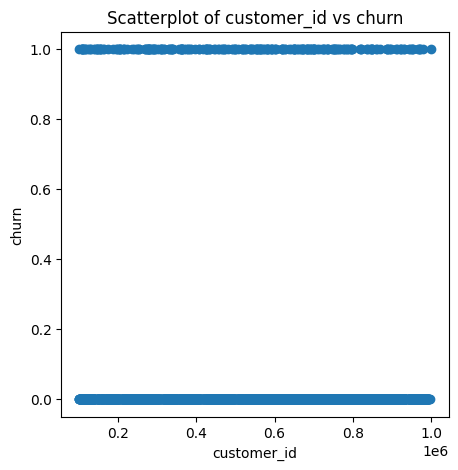

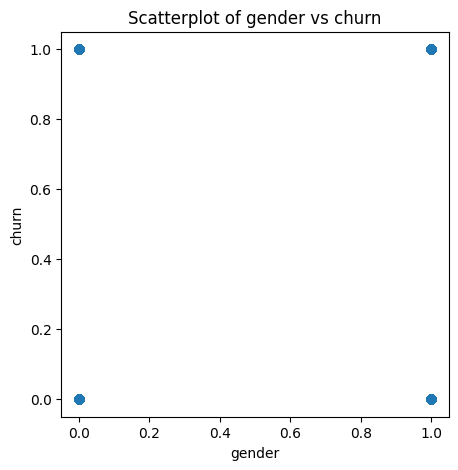

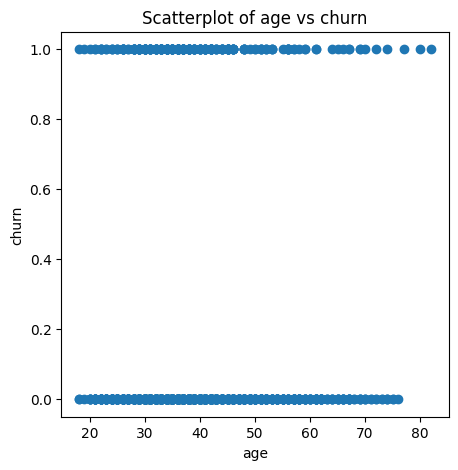

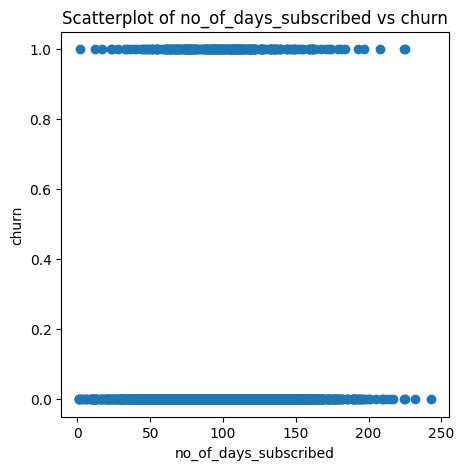

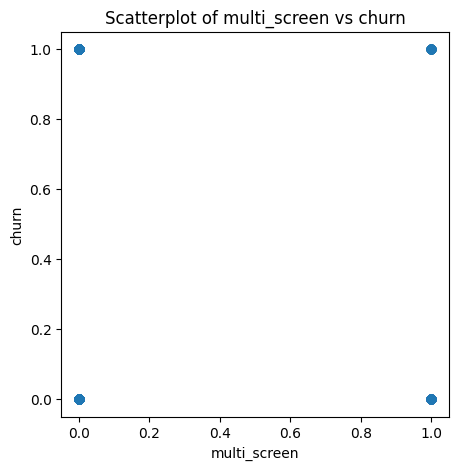

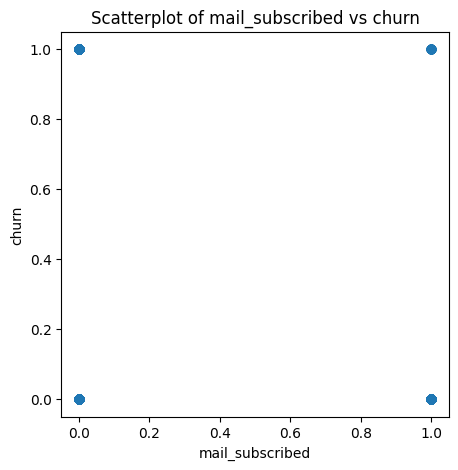

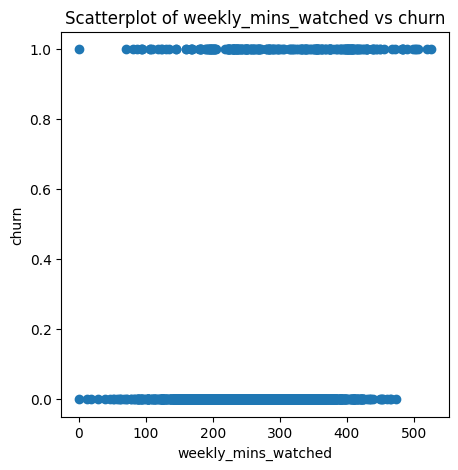

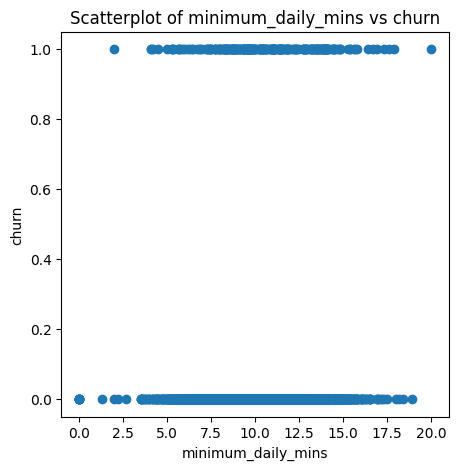

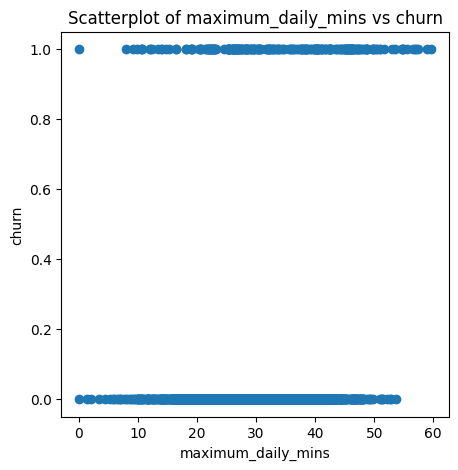

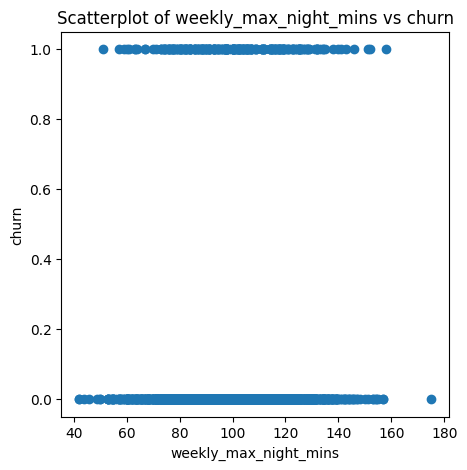

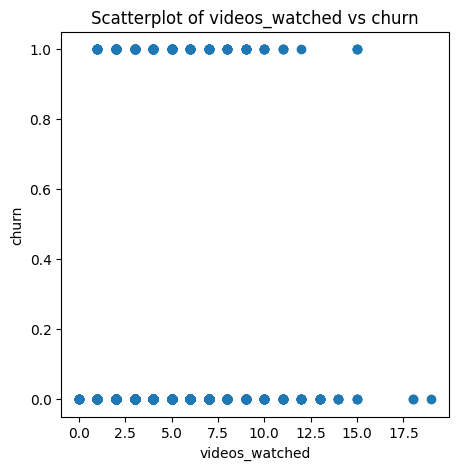

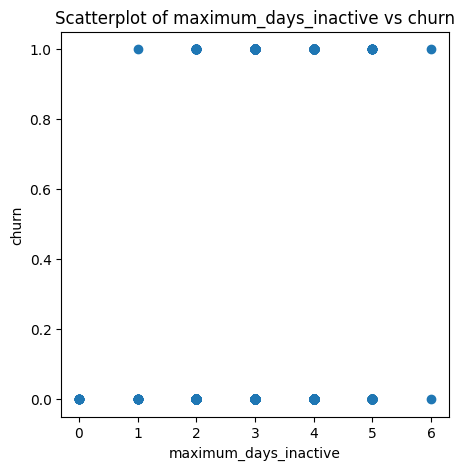

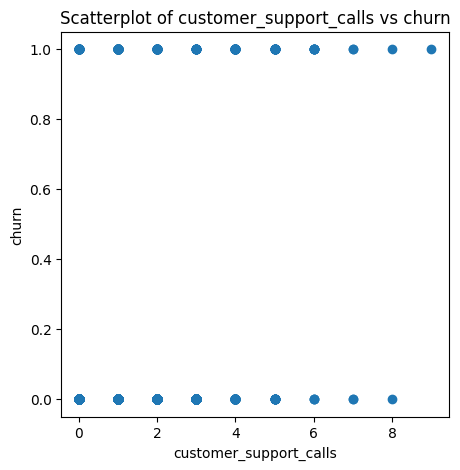

In [16]:
plot_scatterplots(df, df.columns.drop(["year", "phone_no", "churn"]), "churn")

In [36]:
def full_diagnostic(df, class_col):
    sns.pairplot(df, hue=class_col)
    plt.show()

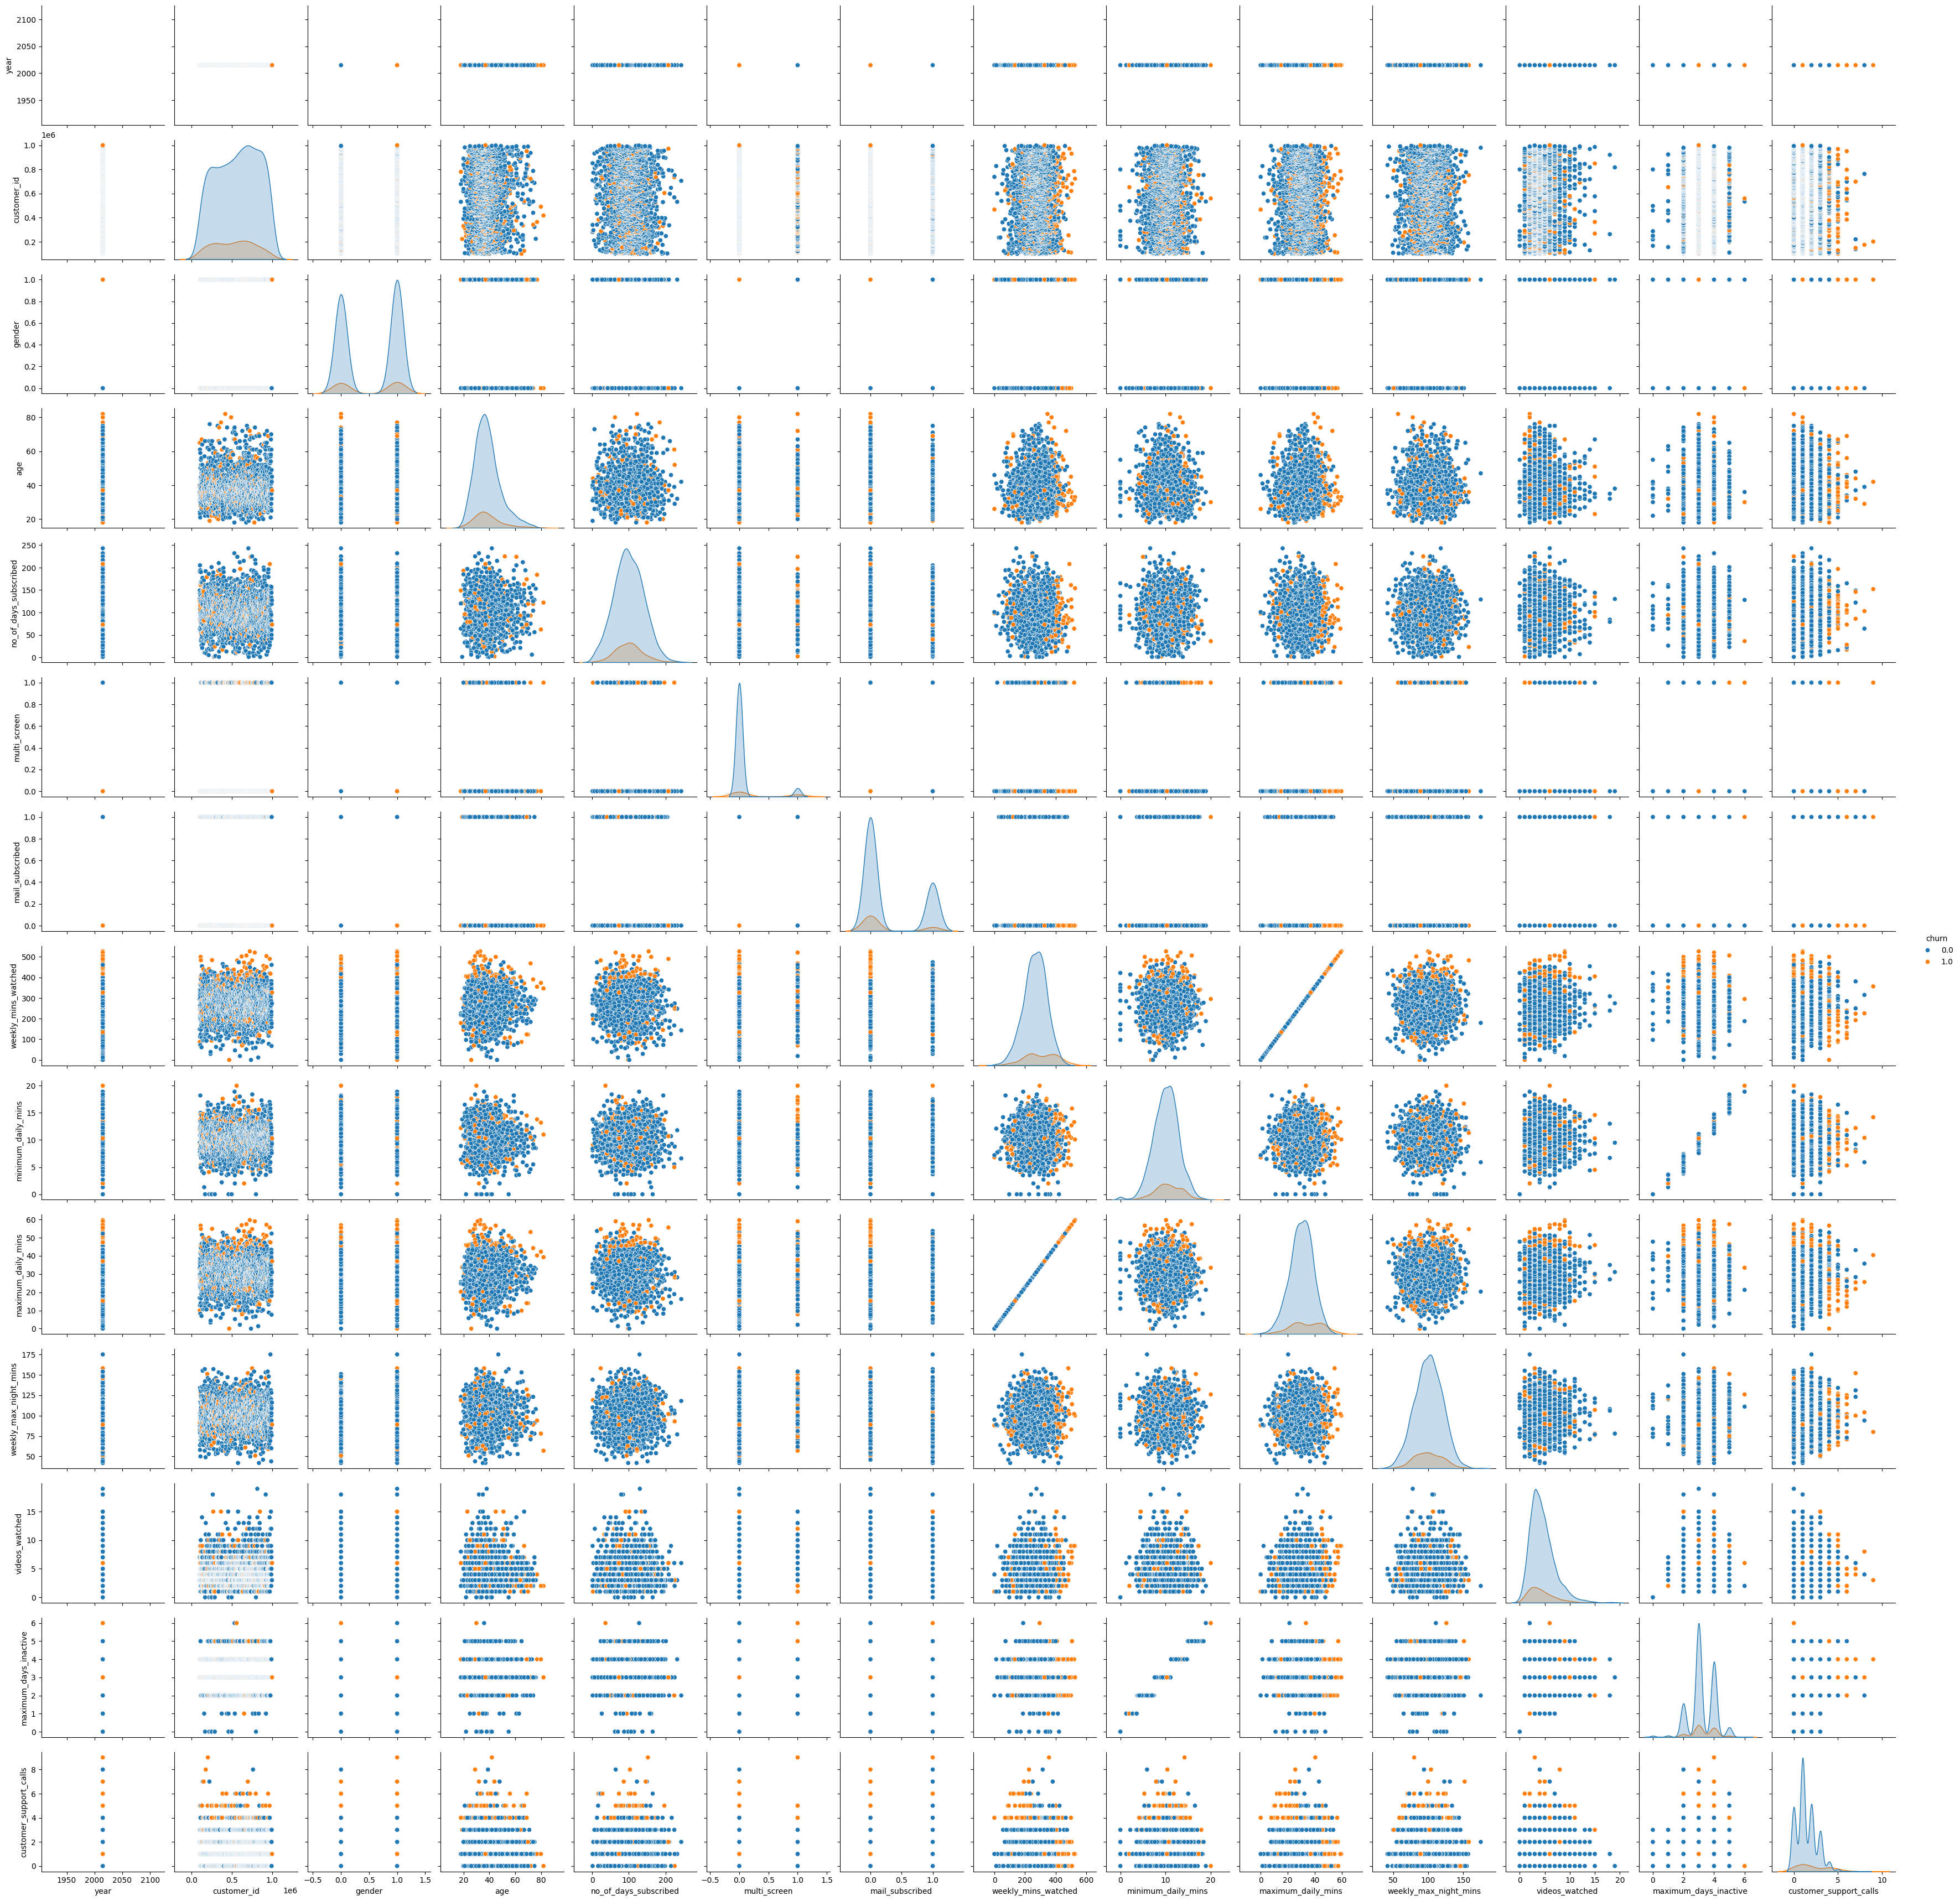

In [37]:
full_diagnostic(df, "churn")

In [44]:
def logistic_regression(df, class_col, cols_to_exclude):
    import statsmodels.api as sm
    import numpy as np

    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]

    y = df[class_col]
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    print(result.summary2())
    
    


In [45]:
logistic_regression(df, class_col = "churn", cols_to_exclude= ["customer_id", "year", "phone_no"])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   churn              Pseudo R-squared:   0.137     
Date:                 2024-04-12 18:41   AIC:                1315.1404 
No. Observations:     1918               BIC:                1381.8488 
Df Model:             11                 Log-Likelihood:     -645.57   
Df Residuals:         1906               LL-Null:            -748.02   
Converged:            1.0000             LLR p-value:        7.1751e-38
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [46]:
import math

math.exp(-0.0208)

0.9794148279480585

In [47]:
#this means an increase in customers age by 1 year increases the probability of churn by 97%

## run the model

In [57]:
def prepare_model(df, class_col, cols_to_exclude):
    from sklearn.model_selection import train_test_split

    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]

    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]

    y = df[class_col]

    global X_train, X_test, y_train, y_test # this allows to to call these variables outside this function
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
    
    

In [65]:
def run_model(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report

    global logreg

    logreg = LogisticRegression(random_state=13)
    logreg.fit(X_train, y_train)


    global y_pred
    y_pred = logreg.predict(X_test)

    logit_roc_auc = roc_auc_score(y_test, y_pred)


    print("Classification report is \n\n", classification_report(y_test, y_pred))
    print("Area under the curve is ", logit_roc_auc)

In [66]:
prepare_model(df, "churn", cols_to_exclude= ["customer_id", "year", "phone_no"])
run_model(X_train, X_test, y_train, y_test)

Classification report is 

               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

Area under the curve is  0.5547201336675021


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
def confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

    tn, fp, fn, tp = confusion_matrix.ravel()

    print(f"True positive: ", tp)
    print(f"False positive: ", fp)
    print(f"True negative: ", tn)
    print(f"False negative: ", fn)

In [83]:
def roc_curve(logreg, X_test, y_test):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))

    #setting the graph area
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])


    #plotting the worst line possible
    plt.plot([0, 1], [0 ,1], "b--")

    #plotting the logistic regression we have built
    plt.plot(fpr, tpr, color="darkorange", label="Logistic Regression" % logit_roc_auc)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig("Log_ROC")
    plt.show()

In [81]:
confusion_matrix(y_test, y_pred)

[[504   9]
 [ 55   8]]
True positive:  8
False positive:  9
True negative:  504
False negative:  55


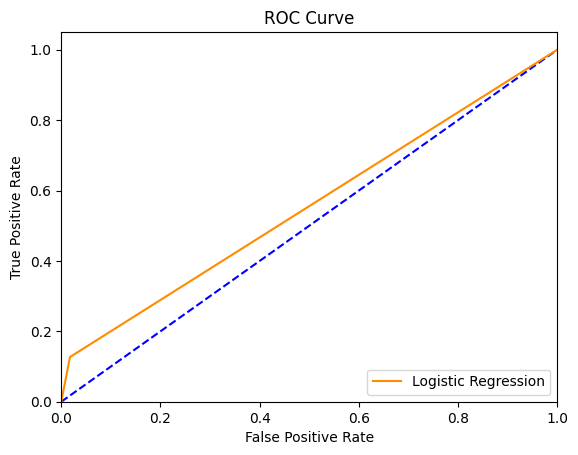

In [84]:
roc_curve(logreg, X_test, y_test)

## save model

In [184]:
import pickle

pickle.dump(logreg, open("model.pkl", "wb"))

model = pickle.load(open("model.pkl", "rb"))

model.predict(X_test)
                         

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## dealing with class imbalance

The response variable has to be balanced between those who churn and those who didn't

In [85]:
df["churn"].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [106]:
def run_model_bweights(X_train, X_test,y_train, y_test):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    
    logreg = LogisticRegression(random_state=13, class_weight="balanced")
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    roc_auc_score = roc_auc_score(y_test, y_pred)
    classification_report = classification_report(y_test, y_pred)

    
    print("Classification report is \n",classification_report)
    print("Area Under curve is ", roc_auc_score)

In [107]:
run_model_bweights(X_train, X_test,y_train, y_test)

Classification report is 
               precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

Area Under curve is  0.7621832358674464


In [129]:
def run_model_aweights(X_train, X_test,y_train, y_test, w):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    
    logreg = LogisticRegression(random_state=13, class_weight=w)
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    roc_auc_score = roc_auc_score(y_test, y_pred)
    classification_report = classification_report(y_test, y_pred)

    print("Area Under curve is ", roc_auc_score)
    print("Classification report is \n",classification_report)
    

In [130]:
run_model_aweights(X_train, X_test,y_train, y_test,{0.90, 1:10})

SyntaxError: invalid syntax (3912213753.py, line 1)

In [132]:
def adjust_balance(X_train,y_train, class_col):
    from sklearn.utils import resample
    from sklearn.metrics import roc_auc_score, classification_report
    import pandas as pd
    X = pd.concat([X_train, y_train], axis=1)

    #separate the two columns
    class0 = X[X[class_col] == 0]
    class1 = X[X[class_col] == 1]

    #Case 1  -- bootstrap from the minority class
    if len(class1) < len(class0):
        resampled = resample(class1,
                            replace=True,
                            n_samples = len(class0),
                            random_state = 10
                            )
        resampled_df = pd.concat([resampled, class0])
    else:
        resampled = resample(class1,
                            replace = False,
                            random_state= 10)
        
        resampled_df = pd.concat([resampled, class0])

    return resampled_df
        
print("Classification report is \n",classification_report)
print("Area Under curve is ", roc_auc_score)
        
    

In [134]:
resampled_df = adjust_balance(X_train, y_train, "churn")

In [139]:
prepare_model(resampled_df, "churn", cols_to_exclude= ["customer_id", "year", "phone_no"])
run_model(X_train, X_test, y_train, y_test)

Classification report is 

               precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       339
         1.0       0.73      0.66      0.69       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

Area under the curve is  0.701768240199888


In [140]:
# using smote

In [159]:
def prepare_model_smote(df, class_col, cols_to_exclude):
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE

    cols = df.select_dtypes(np.number).columns.tolist()

    X = df[cols]

    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]

    y = df[class_col]

    global X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state=0)
    X_train, y_train = sm.fit_resample(X_train, y_train)

In [160]:
prepare_model_smote(df, "churn", cols_to_exclude= ["customer_id", "year", "phone_no"])
run_model(X_train, X_test, y_train, y_test)

Classification report is 

               precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       513
         1.0       0.26      0.71      0.38        63

    accuracy                           0.75       576
   macro avg       0.61      0.73      0.61       576
weighted avg       0.88      0.75      0.79       576

Area under the curve is  0.7343358395989976


## feature selection

This is useful to selet the best features from the dataset due to high computational cost of using large features in datasets

In [168]:
#rfe method

def rfe_selection(df,cols_to_exclude, class_col, model):
    from sklearn.feature_selection import RFE

    cols = df.select_dtypes(include = np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference(cols_to_exclude)]
    X = X[X.columns.difference([class_col])]

    y = df[class_col]

    rfe = RFE(model)
    rfe = rfe.fit(X, y)

    global selected_columns
    selected_columns = X.columns[rfe.support_]

    print("The selected columns are: ")
    print(list(selected_columns))
    

In [177]:
rfe_selection(df,class_col="churn", model=logreg, cols_to_exclude=["customer_id", "year", "phone_no"])

The selected columns are: 
['customer_support_calls', 'gender', 'mail_subscribed', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen']


In [182]:
prepare_model(resampled_df, "churn", cols_to_exclude= ["customer_id", "year", "phone_no", 'age','no_of_days_subscribed','weekly_mins_watched', 'maximum_daily_mins', 'weekly_max_night_mins','videos_watched','churn'])
run_model(X_train, X_test, y_train, y_test)



Classification report is 

               precision    recall  f1-score   support

         0.0       0.65      0.81      0.72       339
         1.0       0.75      0.58      0.65       353

    accuracy                           0.69       692
   macro avg       0.70      0.69      0.68       692
weighted avg       0.70      0.69      0.68       692

Area under the curve is  0.6901902780215097
